In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('C:/Users/HP/Desktop/Projects_data/Kaggle competition/Multi-Class Prediction of Obesity Risk/train.csv')
test_data = pd.read_csv('C:/Users/HP/Desktop/Projects_data/Kaggle competition/Multi-Class Prediction of Obesity Risk/test.csv')
sample_submission = pd.read_csv('C:/Users/HP/Desktop/Projects_data/Kaggle competition/Multi-Class Prediction of Obesity Risk/sample_submission.csv')

In [3]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
sample_submission.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [8]:
train_data.shape

(20758, 18)

In [9]:
train_data.duplicated().any()

False

In [10]:
test_data.duplicated().any()

False

In [11]:
train_data.isna().any()

id                                False
Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [12]:
test_data.isna().any()

id                                False
Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
dtype: bool

In [13]:
categorical_columns = test_data.select_dtypes('object').columns
categorical_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [14]:
for col in train_data.select_dtypes('object').columns:
    unique_values = train_data[col].unique()
    print(f'unique value in {col} : {unique_values}')

unique value in Gender : ['Male' 'Female']
unique value in family_history_with_overweight : ['yes' 'no']
unique value in FAVC : ['yes' 'no']
unique value in CAEC : ['Sometimes' 'Frequently' 'no' 'Always']
unique value in SMOKE : ['no' 'yes']
unique value in SCC : ['no' 'yes']
unique value in CALC : ['Sometimes' 'no' 'Frequently']
unique value in MTRANS : ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
unique value in NObeyesdad : ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [15]:
train_data.select_dtypes('object').describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


In [16]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


* young people mostly those in their 20s are mostly 

Data Visualization

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>]],
      dtype=object)

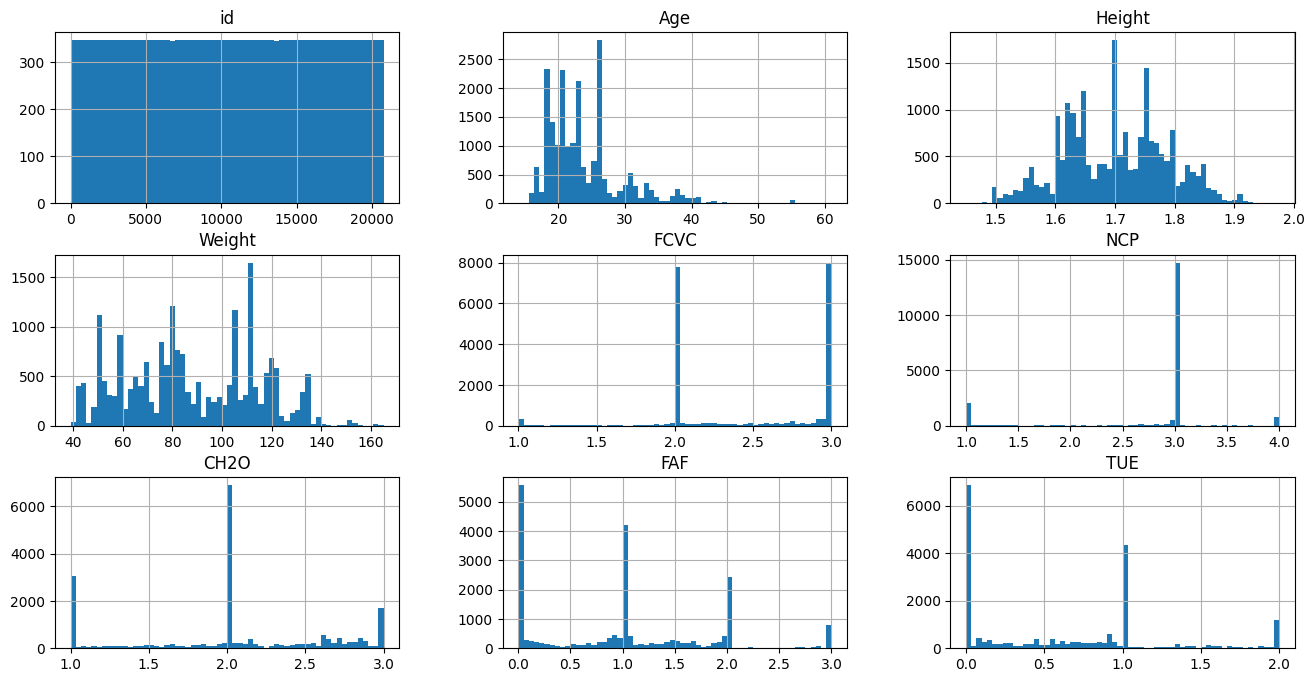

In [17]:
train_data.hist(bins=60,figsize=(16,8))

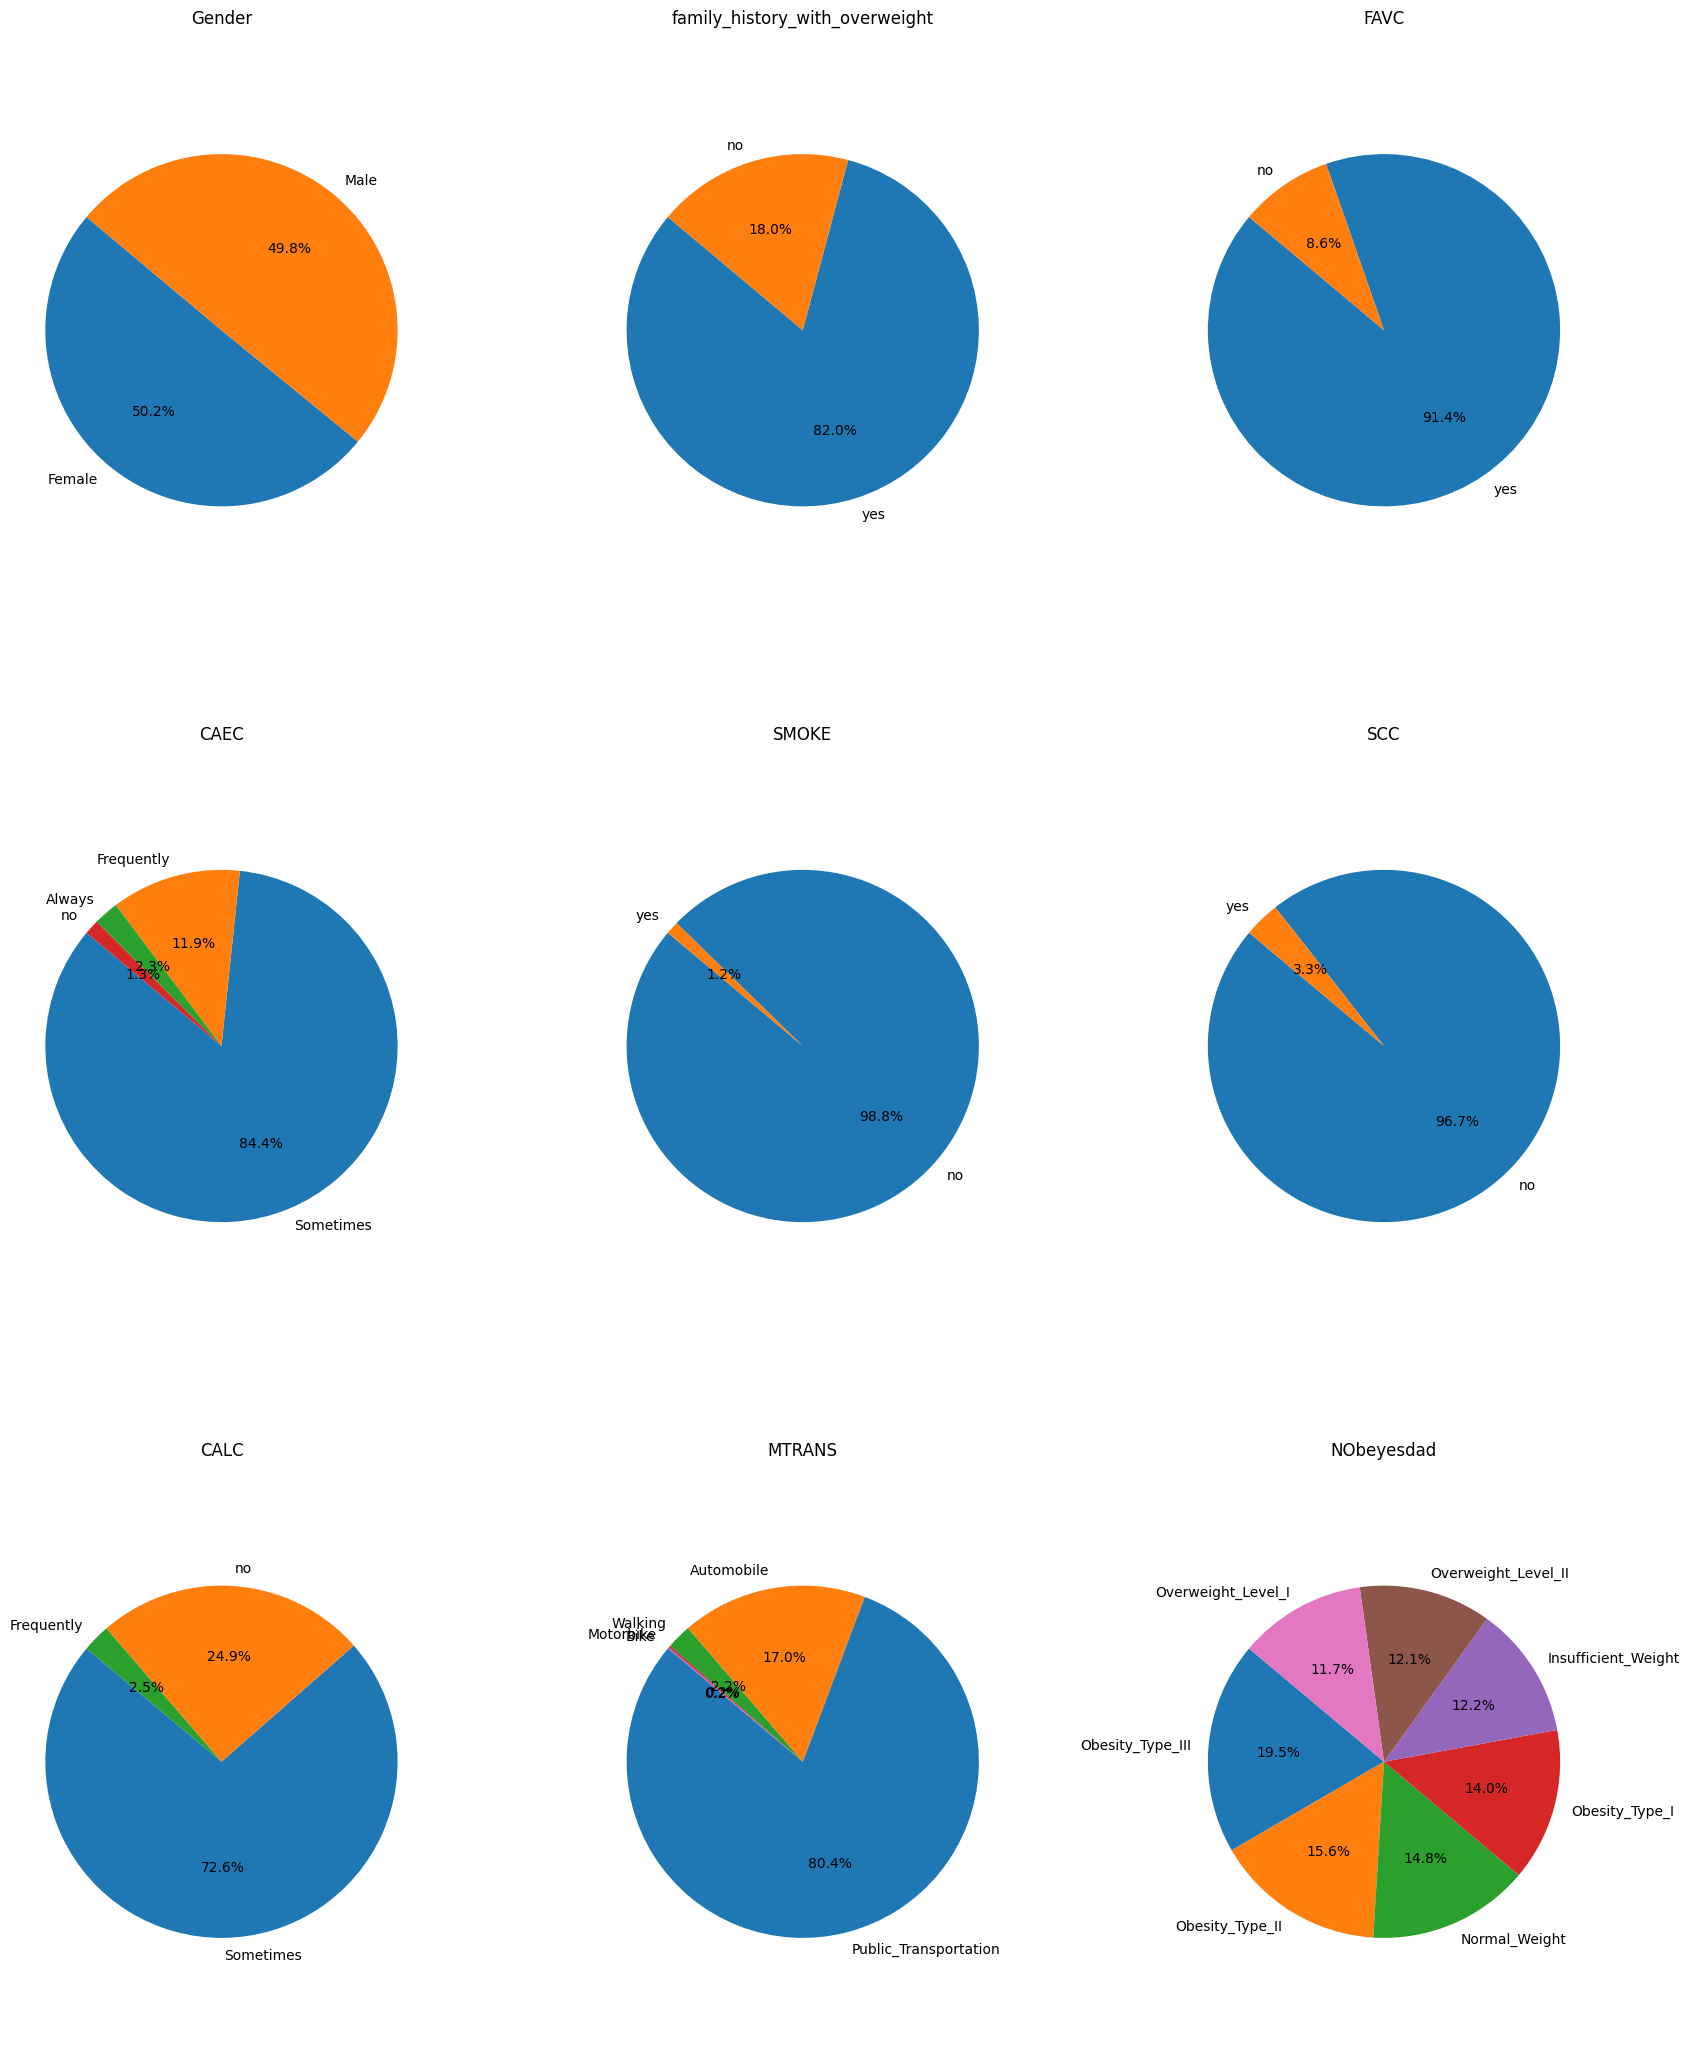

In [18]:
plt.figure(figsize=(20,12))
row = len(categorical_columns)//3 +1
for i,col in enumerate(train_data.select_dtypes('object').columns):
    category_frequency = train_data[col].value_counts()
    plt.subplot(row,3,i+1)
    plt.pie(category_frequency.values, labels = category_frequency.index, autopct='%1.1f%%', startangle=140,labeldistance=1.1)
    plt.axis('equal')
    plt.title(f'{col}')
    plt.subplots_adjust(top= 1.8,wspace=0.5)

* 82% of the total population are found to have family history with overweight
* 91.4% people consume food with high calorific value(FAVC)
* only 14% people take food more often between meals(CAEC)
* most of the people don't have any smoking habit
* only 3.3% people consume carbonated beverages(SCC)
* 75% people take alcohol(CALC)
* only 14.8% people have the normal weight and rest are suffering from some sort of overweight or insufficient weight

In [19]:
pd.crosstab(train_data['NObeyesdad'], train_data['Gender'])

Gender,Female,Male
NObeyesdad,,
Insufficient_Weight,1621,902
Normal_Weight,1660,1422
Obesity_Type_I,1267,1643
Obesity_Type_II,8,3240
Obesity_Type_III,4041,5
Overweight_Level_I,1070,1357
Overweight_Level_II,755,1767


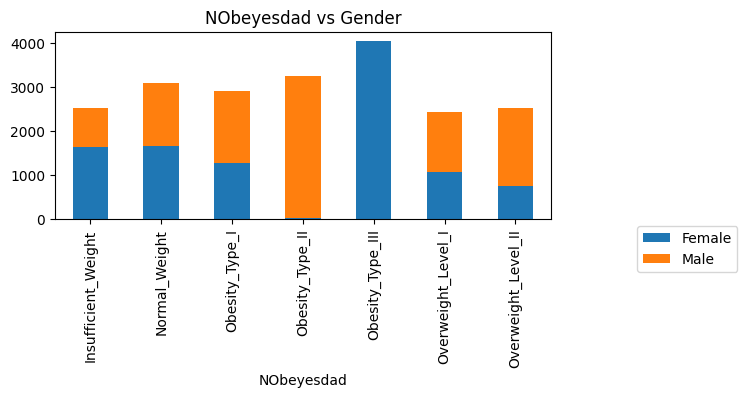

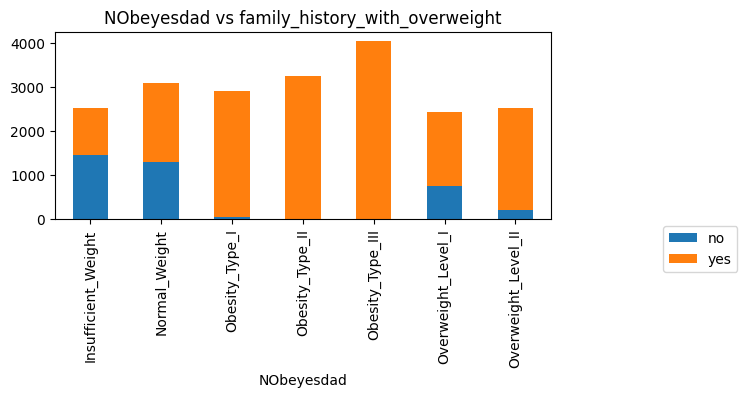

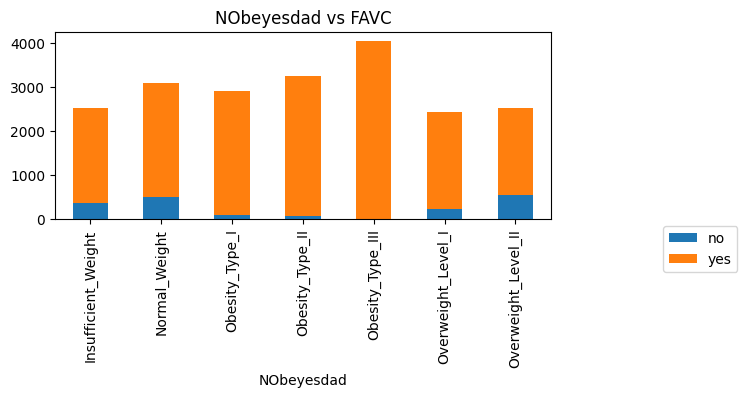

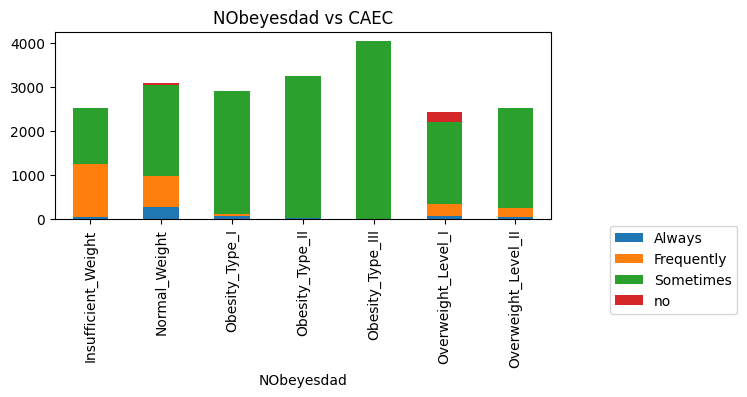

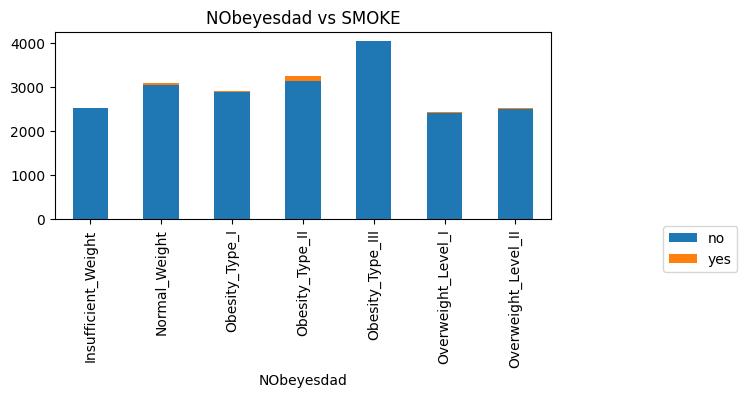

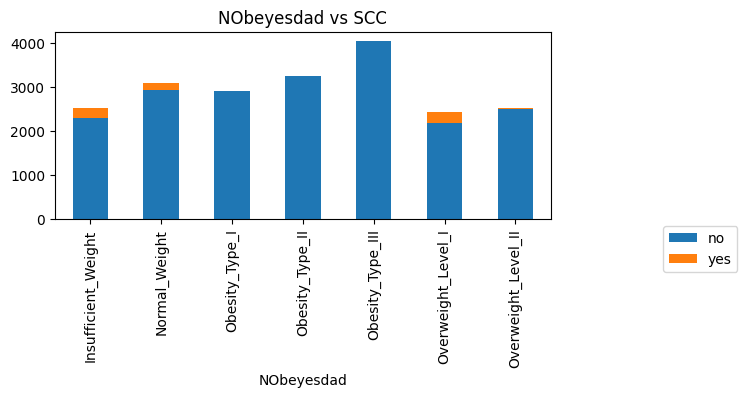

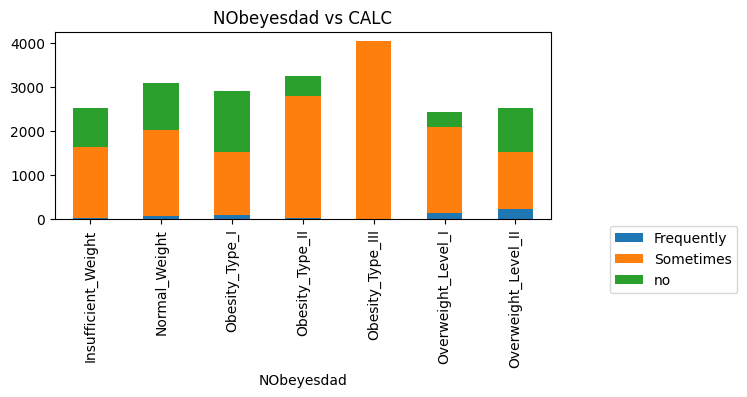

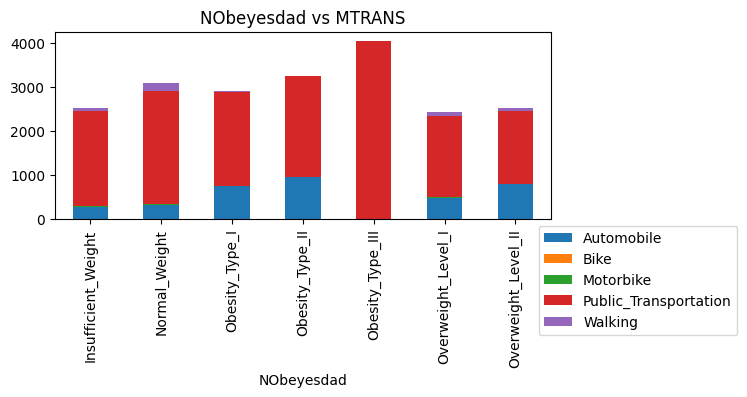

In [20]:
for col in test_data.select_dtypes('object').columns:
    train_data.groupby('NObeyesdad')[col].value_counts().unstack().plot(kind='bar',stacked=True)
    plt.title(f'NObeyesdad vs {col}')
    plt.legend(loc='upper right',bbox_to_anchor=(1.39,0))
    plt.subplots_adjust(top=0.5)

In [21]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [22]:
train_data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [23]:
corr_data = train_data.select_dtypes('float64').corr()
corr_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


<Axes: >

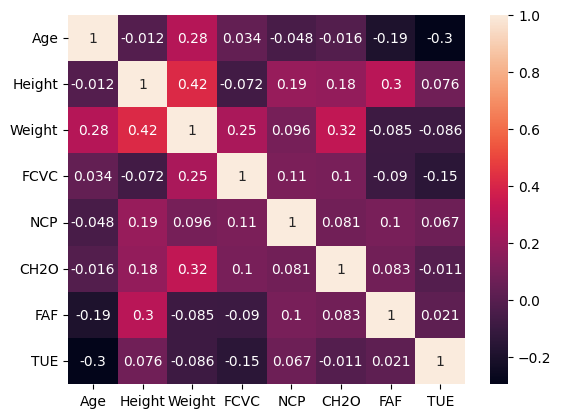

In [24]:
sns.heatmap(corr_data,annot=True)

* The numerical columns are weakly correlated. That means there is little linear relationship between the numerical features. While linear correlation may be weak, there could still be non-linear relationships between features. 

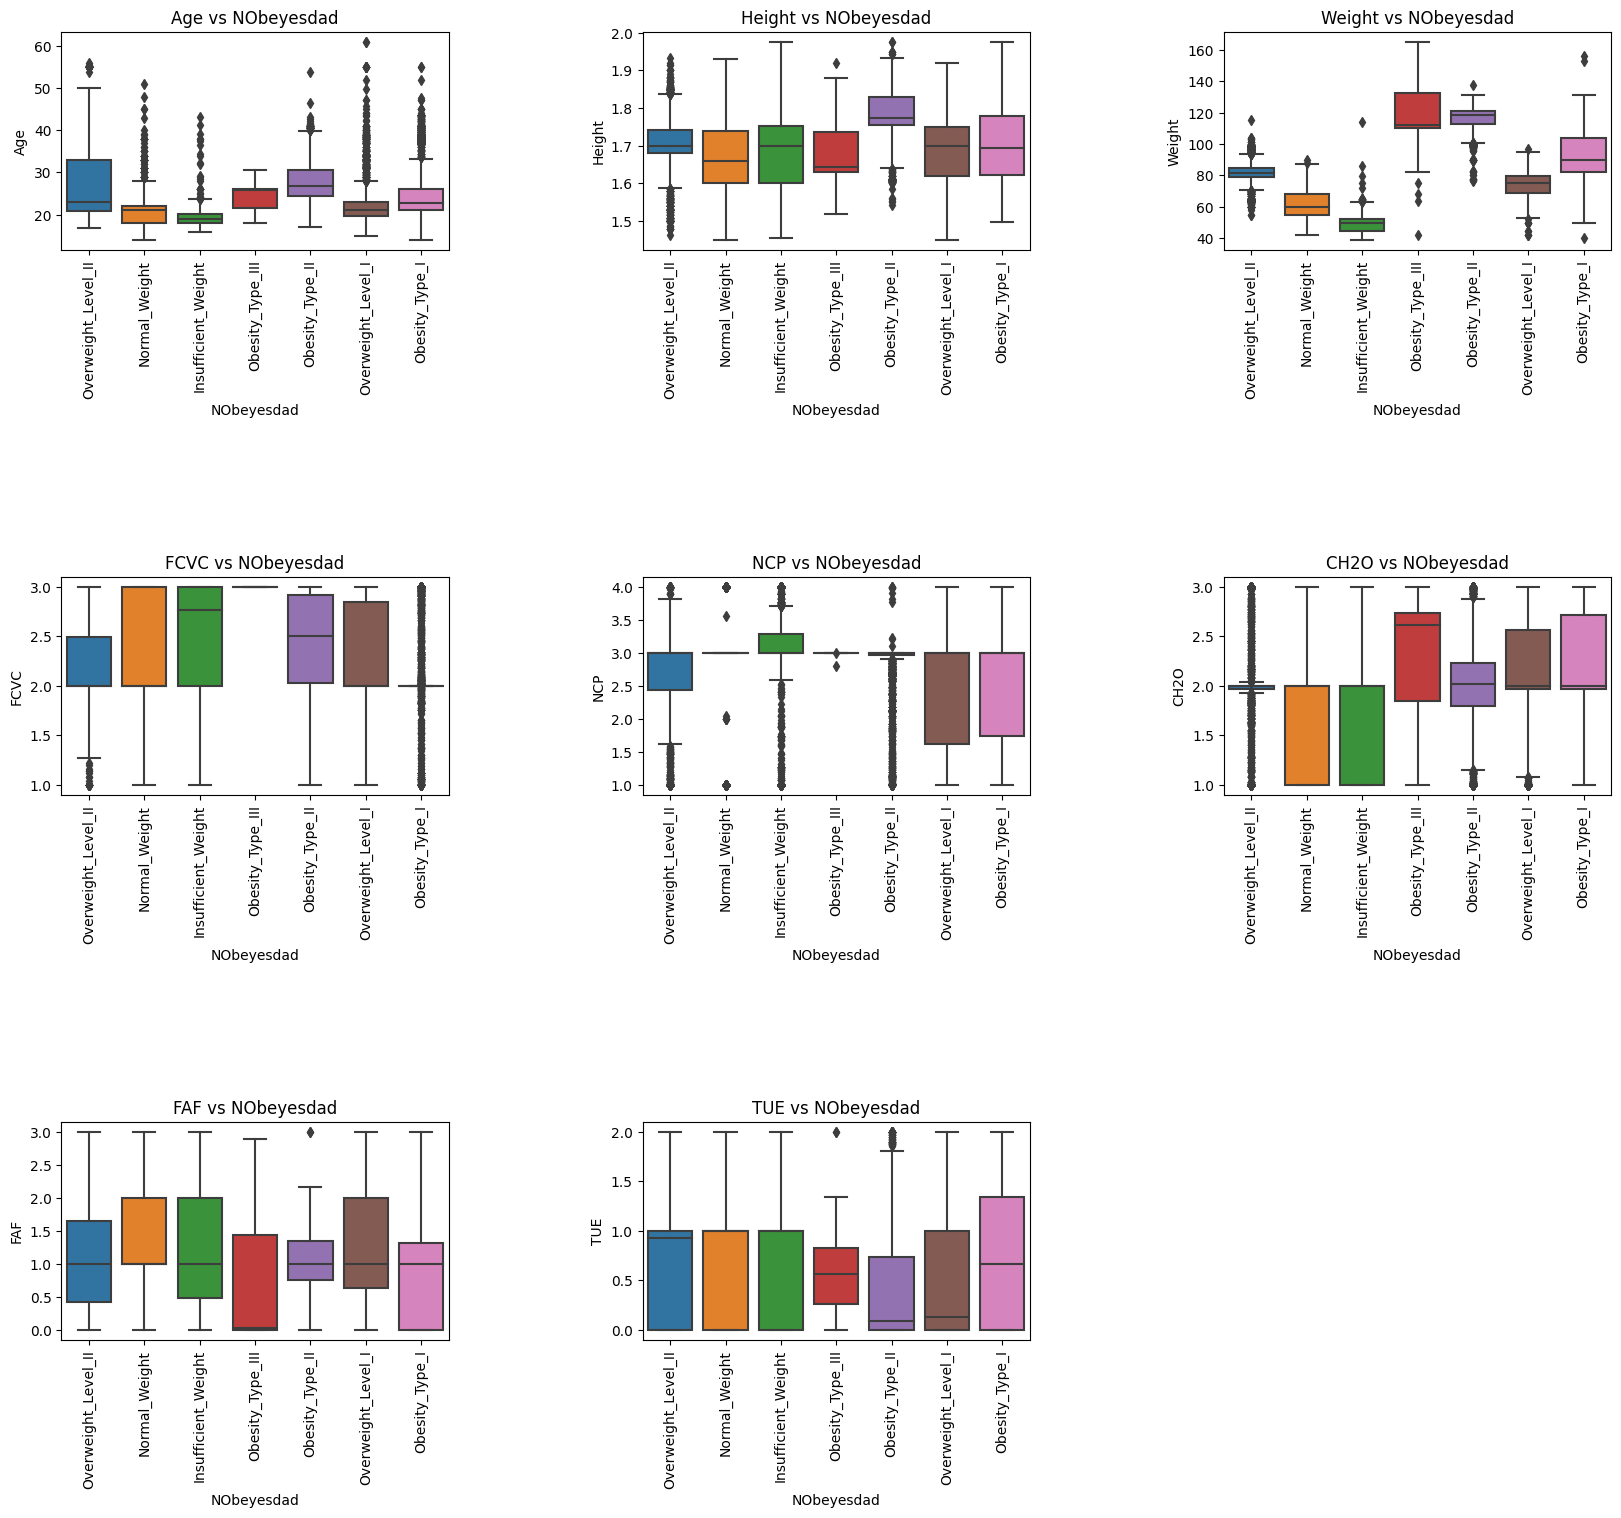

In [25]:
plt.figure(figsize=(20,12))
for i,col in enumerate(train_data.select_dtypes('float64').columns):
    plt.subplot(row,3,i+1)
    sns.boxplot(x=train_data['NObeyesdad'],y=train_data[col],orient='v')
    plt.title(f'{col} vs NObeyesdad')
    plt.subplots_adjust(top=1.2,wspace=0.5,hspace=1.5)
    plt.xticks(rotation=90)

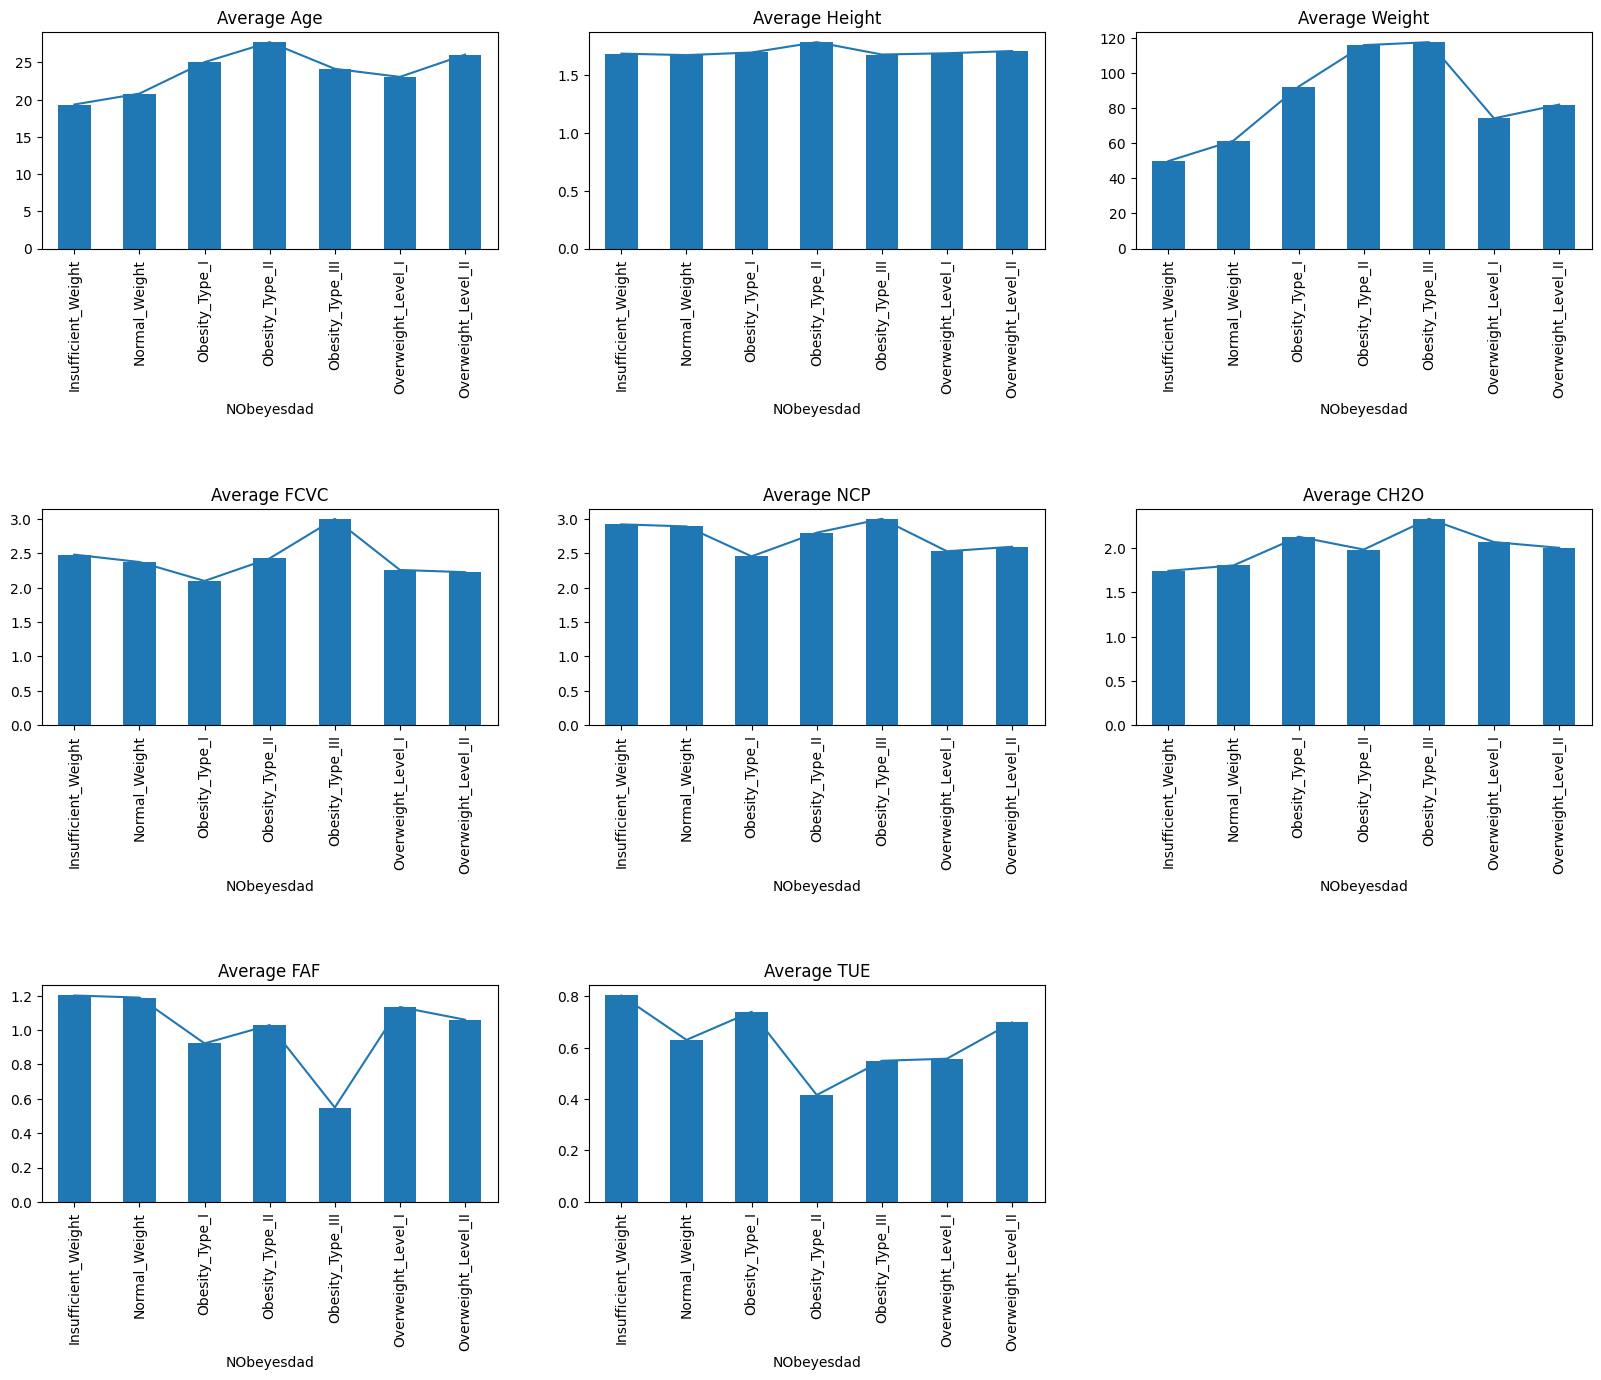

In [26]:
plt.figure(figsize=(20,row*10))
for i,col in enumerate(train_data.select_dtypes('float64').columns):
    plt.subplot(row,3,i+1)
    train_data.groupby('NObeyesdad')[col].mean().plot(kind='bar')
    train_data.groupby('NObeyesdad')[col].mean().plot(kind='line')
    plt.title(f'Average {col}')
    plt.xticks(rotation=90)
plt.subplots_adjust(top=0.5,hspace=1.2)

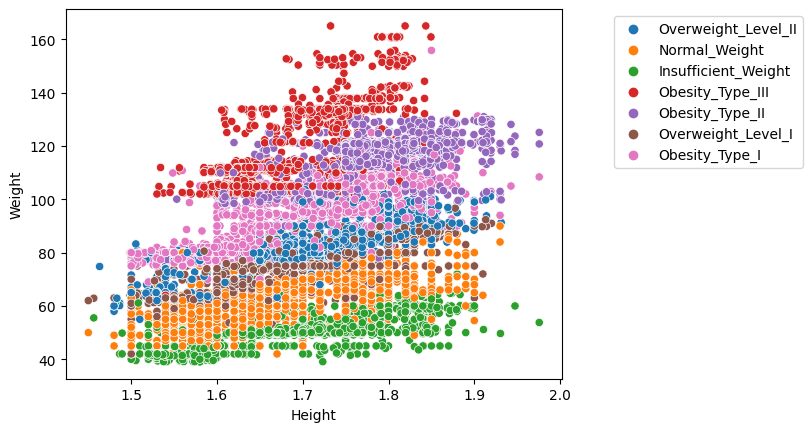

In [27]:
sns.scatterplot(x='Height',y='Weight',data=train_data,hue='NObeyesdad')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1))

ANOVA Test

Null Hypothesis - There is no significant difference between the means of different obesity category.

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
for col in train_data.select_dtypes('float64').columns:
    model = ols(f"{col} ~ C(NObeyesdad)", data = train_data).fit()
    anova_table = sm.stats.anova_lm(model,typ=1)
    print(f"ANOVA results for {col}:")
    print(anova_table)

ANOVA results for Age:
                    df         sum_sq       mean_sq           F  PR(>F)
C(NObeyesdad)      6.0  146261.156979  24376.859497  962.936496     0.0
Residual       20751.0  525314.196282     25.315127         NaN     NaN
ANOVA results for Height:
                    df      sum_sq   mean_sq           F  PR(>F)
C(NObeyesdad)      6.0   28.495092  4.749182  759.579663     0.0
Residual       20751.0  129.743175  0.006252         NaN     NaN
ANOVA results for Weight:
                    df        sum_sq       mean_sq             F  PR(>F)
C(NObeyesdad)      6.0  1.254674e+07  2.091123e+06  22867.945866     0.0
Residual       20751.0  1.897542e+06  9.144340e+01           NaN     NaN
ANOVA results for FCVC:
                    df       sum_sq     mean_sq            F  PR(>F)
C(NObeyesdad)      6.0  1827.971016  304.661836  1551.918278     0.0
Residual       20751.0  4073.692440    0.196313          NaN     NaN
ANOVA results for NCP:
                    df       sum_sq     m

From the ANOVA results, it appears that all p-values associated with the F-statistics are very close to zero (0.0 or 1.424955e-183), indicating extremely strong evidence against the null hypothesis. Therefore, we should reject the null hypothesis for all the numerical features tested,and conclude that there are significant differences in the means of the numerical features across the categories of the target variable.

In [29]:
train_data['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [30]:
train_data['BMI'] = train_data['Weight'] / (train_data['Height'] ** 2)
test_data['BMI'] = test_data['Weight'] / (test_data['Height'] ** 2)

# Preprocessing:-

In [31]:
train_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,28.899693


In [32]:
categorical_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [33]:
for col in categorical_columns:
    print(f'unique values in {col}: ',train_data[col].unique())

unique values in Gender:  ['Male' 'Female']
unique values in family_history_with_overweight:  ['yes' 'no']
unique values in FAVC:  ['yes' 'no']
unique values in CAEC:  ['Sometimes' 'Frequently' 'no' 'Always']
unique values in SMOKE:  ['no' 'yes']
unique values in SCC:  ['no' 'yes']
unique values in CALC:  ['Sometimes' 'no' 'Frequently']
unique values in MTRANS:  ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']


In [34]:
one_hot_columns = ['Gender', 'family_history_with_overweight','FAVC','SMOKE', 'SCC','MTRANS']
ordinal_columns = ['CAEC', 'CALC']
numerical_columns = train_data.select_dtypes(['int64','float64']).columns.to_list()

In [35]:
from sklearn.model_selection import train_test_split

y = train_data['NObeyesdad']
X = train_data.drop(columns='NObeyesdad')
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8)

In [36]:
X_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
19306,19306,Female,26.000000,1.624950,111.884535,yes,yes,3.000000,3.000000,Sometimes,no,2.619517,no,0.000000,0.269577,Sometimes,Public_Transportation,42.373082
4918,4918,Female,20.978166,1.801478,151.417292,yes,yes,3.000000,3.000000,Sometimes,no,2.226081,no,1.881761,0.933964,Sometimes,Public_Transportation,46.657079
5850,5850,Male,30.000000,1.700000,68.000000,no,no,2.000000,3.000000,Sometimes,no,1.000000,no,0.000000,0.000000,Sometimes,Automobile,23.529412
18598,18598,Female,22.038327,1.753578,51.457226,yes,yes,2.000000,3.000000,Frequently,no,1.000000,no,0.098043,1.000000,no,Public_Transportation,16.733862
18616,18616,Male,22.000000,1.720000,52.000000,yes,yes,2.000000,4.000000,Frequently,no,2.000000,no,2.000000,2.000000,no,Public_Transportation,17.577069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11904,11904,Male,30.607546,1.872517,129.157346,yes,yes,2.967300,3.000000,Sometimes,yes,1.774778,no,0.902776,0.000000,Sometimes,Public_Transportation,36.835585
19123,19123,Male,30.577343,1.650012,103.180918,yes,yes,2.880792,2.701521,Sometimes,no,1.000000,no,0.165422,0.000000,Sometimes,Public_Transportation,37.898776
4540,4540,Male,22.000000,1.700000,86.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,no,3.000000,0.000000,Sometimes,Public_Transportation,29.757785
10290,10290,Female,18.940930,1.723587,131.877558,yes,yes,3.000000,3.000000,Sometimes,no,1.687611,no,1.932386,0.926565,Sometimes,Public_Transportation,44.391976


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

one_hot_encoder = OneHotEncoder(drop='first')
ordinal_encoder = OrdinalEncoder()
numerical_preprocessor = 'passthrough'

preprocessor = ColumnTransformer([
                                    ('onehot',one_hot_encoder,one_hot_columns),
                                    ('ordinal',ordinal_encoder,ordinal_columns),
                                    ('numpr',numerical_preprocessor,numerical_columns)
])


In [38]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'SMOKE', 'SCC', 'MTRANS']),
                                ('ordinal', OrdinalEncoder(), ['CAEC', 'CALC']),
                                ('numpr', 'passthrough',
                                 ['id', 'Age', 'Height', 'Weight', 'FCVC',
                                  'NCP', 'CH2O', 'FAF', 'TUE', 'BMI'])])

In [39]:
one_hot_encoded_features_name = preprocessor.named_transformers_['onehot'].get_feature_names_out()

In [40]:
one_hot_encoded_features_name

array(['Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'SMOKE_yes', 'SCC_yes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'], dtype=object)

In [41]:
X_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(X_train), columns = list(one_hot_encoded_features_name) + ordinal_columns + numerical_columns)
X_val_preprocessed = pd.DataFrame(preprocessor.transform(X_val), columns = list(one_hot_encoded_features_name) + ordinal_columns + numerical_columns)


In [42]:
X_train_preprocessed

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,...,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,19306.0,26.000000,1.624950,111.884535,3.000000,3.000000,2.619517,0.000000,0.269577,42.373082
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,4918.0,20.978166,1.801478,151.417292,3.000000,3.000000,2.226081,1.881761,0.933964,46.657079
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,5850.0,30.000000,1.700000,68.000000,2.000000,3.000000,1.000000,0.000000,0.000000,23.529412
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,18598.0,22.038327,1.753578,51.457226,2.000000,3.000000,1.000000,0.098043,1.000000,16.733862
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,18616.0,22.000000,1.720000,52.000000,2.000000,4.000000,2.000000,2.000000,2.000000,17.577069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,...,11904.0,30.607546,1.872517,129.157346,2.967300,3.000000,1.774778,0.902776,0.000000,36.835585
16602,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,19123.0,30.577343,1.650012,103.180918,2.880792,2.701521,1.000000,0.165422,0.000000,37.898776
16603,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,4540.0,22.000000,1.700000,86.000000,3.000000,3.000000,2.000000,3.000000,0.000000,29.757785
16604,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,10290.0,18.940930,1.723587,131.877558,3.000000,3.000000,1.687611,1.932386,0.926565,44.391976


In [43]:
X_val_preprocessed

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,...,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2315.0,23.000000,1.540000,50.000000,2.000000,3.000000,1.000000,0.000000,1.000000,21.082813
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,2685.0,20.000000,1.600000,45.000000,3.000000,3.000000,1.000000,1.000000,0.000000,17.578125
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,14082.0,17.000000,1.740000,56.000000,2.000000,4.000000,2.000000,2.000000,1.000000,18.496499
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,17586.0,21.000000,1.800000,88.000000,2.000000,1.000000,3.000000,1.000000,0.000000,27.160494
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,19698.0,21.000000,1.600000,60.000000,2.000000,3.000000,1.000000,0.000000,0.000000,23.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,20073.0,37.613378,1.762887,118.424156,2.037042,3.000000,2.003563,0.665439,1.551934,38.105823
4148,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,12823.0,19.211640,1.856406,87.668828,2.332074,3.714833,2.429059,2.000000,0.908836,25.438955
4149,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,16990.0,23.000000,1.742364,105.696358,2.000000,3.000000,2.651258,1.000000,0.000000,34.816270
4150,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,13953.0,23.501249,1.566501,44.845655,2.967853,3.000000,1.082084,0.937320,0.000000,18.275069


In [44]:
test_data_preprocessed = pd.DataFrame(preprocessor.fit_transform(test_data), columns = list(one_hot_encoded_features_name) + ordinal_columns + numerical_columns)

# Model  Building

Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train_preprocessed,y_train)
y_pred = model.predict(X_val_preprocessed)
y_pred


array(['Normal_Weight', 'Insufficient_Weight', 'Insufficient_Weight', ...,
       'Obesity_Type_I', 'Insufficient_Weight', 'Insufficient_Weight'],
      dtype=object)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_pred,y_val)

0.8957129094412332

Logistic Regression Model

In [47]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state = 1)
log_model.fit(X_train_preprocessed,y_train)
log_y_pred = log_model.predict(X_val_preprocessed)
log_y_pred

f:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Obesity_Type_III', 'Obesity_Type_III', 'Insufficient_Weight', ...,
       'Obesity_Type_III', 'Insufficient_Weight', 'Insufficient_Weight'],
      dtype=object)

In [48]:
accuracy_score(log_y_pred,y_val)

0.27047206165703275

Support Vector Machine Model

In [49]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train_preprocessed,y_train)
svm_y_pred = svm_classifier.predict(X_val_preprocessed)
svm_y_pred

array(['Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III', ...,
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III'],
      dtype=object)

In [50]:
accuracy_score(svm_y_pred,y_val)

0.1890655105973025

XGB Classifier Model

In [51]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_preprocessed = label_encoder.fit_transform(y_train)

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_preprocessed,y_train_preprocessed,
                   verbose=False)
xgb_y_pred_encoded = xgb_classifier.predict(X_val_preprocessed)
xgb_y_pred = label_encoder.inverse_transform(xgb_y_pred_encoded)
xgb_y_pred

array(['Normal_Weight', 'Insufficient_Weight', 'Insufficient_Weight', ...,
       'Obesity_Type_I', 'Insufficient_Weight', 'Insufficient_Weight'],
      dtype=object)

In [52]:
accuracy_score(xgb_y_pred,y_val)

0.9029383429672447

Neural Network

In [54]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train_preprocessed,num_classes=7)
y_val_encoded = to_categorical(y_val_preprocessed,num_classes=7)

neural_net = keras.Sequential([
    layers.Dense(units=512, activation = 'relu', input_shape = [X_train_preprocessed.shape[1]]),
    layers.Dropout(rate=0.3),
    layers.Dense(units=512, activation = 'relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(units=512, activation = 'relu'),
    layers.Dense(7, activation = 'softmax')
])

neural_net.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

early_stopping = EarlyStopping(min_delta = 0.001,
                              patience = 20,
                              restore_best_weights = True)

history = neural_net.fit(X_train_preprocessed,y_train_encoded,
                        validation_data = (X_val_preprocessed,y_val_encoded),
                        batch_size = 256,
                        epochs = 500,
                        callbacks = [early_stopping],
                         verbose = False)



ImportError: DLL load failed while importing _pywrap_tf2: A dynamic link library (DLL) initialization routine failed.

In [ ]:
history_df = pd.DataFrame(history.history)
history_df

In [ ]:
history_df.loc[:,['loss','val_loss']].plot()

In [ ]:
# Evaluate the model on validation data
loss, accuracy = neural_net.evaluate(X_val_preprocessed, y_val_encoded)

# Print the validation accuracy
print("Validation Accuracy:", accuracy)

* Random Forest Model is performing better as compared to other models

# Submission

In [ ]:
test_y_pred = model.predict(test_data_preprocessed)
test_y_pred

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [ ]:
sample_submission

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Normal_Weight
13838,34596,Normal_Weight


In [ ]:
submission_data = pd.DataFrame({'id': test_data['id'],'Nobeyesdad': test_y_pred})
submission_data.to_csv('submission.csv',index=False)

In [ ]:
submission_data

,id,Nobeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight
